In [ ]:
#红酒模型
import sklearn.tree as tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import pandas as pd

wine = load_wine()
wine.data.shape#178*13
wine.target.shape#178

df = pd.concat([pd.DataFrame(wine.data),pd.DataFrame(wine.target)],axis=1)
wine.feature_names
wine.target_names

In [ ]:
Xtrain, Xtest,Ytrain, Ytest = train_test_split(wine.data,wine.target, test_size=0.3)

Xtrain.shape

In [ ]:
#决策树在处理样本和选取feature拟合上都是随机的-->改善过拟合
#random_state: random seed， 选取随机的feature进行计算，选出最优。feature少的数据集没有随机性
#splitter： best：最优分枝， random：随机分支
clf = tree.DecisionTreeClassifier(criterion='entropy',random_state=30,splitter='random')#Entropy, Gini两种
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)

score

In [ ]:
feature_name = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸']

clf.feature_importances_ #决策树使用的特征和相应的重要性
[*zip(feature_name, clf.feature_importances_)]

In [ ]:
score_train = clf.score(Xtrain,Ytrain)
score

In [ ]:
#优化剪枝
#每生长一层 样本量需求*2
'''
max_depth：高维度，低样本非常有效（扁平数据集）一般从3开始
min_samples_leaf：过小过拟合，过大阻止学习 一般从5开始 float设置百分比 对于叶节点是否保留的参数
min_sample_split：中间节点样本要求 如果大于某个数 就不进行分枝
max_feature：限制特征，消减信息量，降维 对于数据不熟悉不要乱用 考虑PCA ICA
min_impurity_decrease：信息增益小于某值不生长 min_impurity_split旧版本
'''

'''class_weight/ min_weight_fraction_weight
数据偏向捕获某些标签多的情况，但我们需要捕获少的情况，权重'''

##############回归树#######################
#做一个正弦函数的模型拟合
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
%matplotlib inline

#创建正弦函数
#(0,5)的x值
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80,1), axis=0)  #0-1期间的随机数，80行1列 后面导入树模型（不支持一维数组）！！！

#生成y并添加噪声
Y = np.sin(X).ravel() #标签降维
Y[::5] += 3*(0.5-rng.rand(16))
plt.scatter(X,Y)

In [18]:
reg1=DecisionTreeRegressor(max_depth=2)
reg2=DecisionTreeRegressor(max_depth=5)
reg1.fit(X,Y)
reg2.fit(X,Y)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [20]:
X_test=np.arange(0,5,0.01)[:,np.newaxis]#增加维度 [:,np.newaxis] 一列


array([[0.  ],
       [0.01],
       [0.02],
       [0.03],
       [0.04],
       [0.05],
       [0.06],
       [0.07],
       [0.08],
       [0.09],
       [0.1 ],
       [0.11],
       [0.12],
       [0.13],
       [0.14],
       [0.15],
       [0.16],
       [0.17],
       [0.18],
       [0.19],
       [0.2 ],
       [0.21],
       [0.22],
       [0.23],
       [0.24],
       [0.25],
       [0.26],
       [0.27],
       [0.28],
       [0.29],
       [0.3 ],
       [0.31],
       [0.32],
       [0.33],
       [0.34],
       [0.35],
       [0.36],
       [0.37],
       [0.38],
       [0.39],
       [0.4 ],
       [0.41],
       [0.42],
       [0.43],
       [0.44],
       [0.45],
       [0.46],
       [0.47],
       [0.48],
       [0.49],
       [0.5 ],
       [0.51],
       [0.52],
       [0.53],
       [0.54],
       [0.55],
       [0.56],
       [0.57],
       [0.58],
       [0.59],
       [0.6 ],
       [0.61],
       [0.62],
       [0.63],
       [0.64],
       [0.65],
       [0.

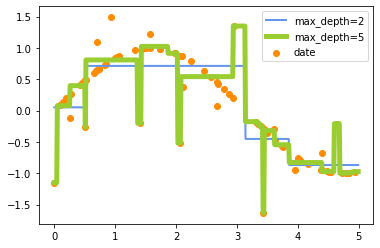

In [22]:
Y_1 = reg1.predict(X_test)
Y_2 = reg2.predict(X_test)
plt.figure()
plt.scatter(X,Y, c='darkorange', label='date')
plt.plot(X_test, Y_1, c='cornflowerblue', label='max_depth=2', linewidth=2)
plt.plot(X_test, Y_2, c='yellowgreen', label ='max_depth=5', linewidth=5)
plt.legend()
plt.show()